# Description
**Here you can find a quick validation and visualization of the MosMed dataset**

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt 
import skimage

import nibabel as nib

sys.path.append('../')
from src.data.utils import get_single_slice, plot_slice_subsample, clip_housenfield_range

## Data structure
- The data is located in the **MosMedData_COVID19_1110** folder


- **studies**  directory contains directories named as  CT-0,  CT-1,  CT-2,  CT-3, and  CT-4. Each directory contains studies in  NIfTI  format, that have been saved in  Gzip  archive. Each study has a unique name like study_BBBB.nii.gz , where  BBBB  is a sequential number of the study in the whole dataset.


-  **masks**  directory contains binary pixel masks in  NIfTI  format, that have been saved in  Gzip  archive. Each study has a unique name like  study_BBBB_mask.nii.gz , where  BBBB  is a number of the corresponding study.



### Class labels
- **CT-0** : normal lung tissue, no CT-signs of viral pneumonia.
- **CT-1** : several ground-glass opacifications, involvement of lung parenchyma is less than 25%.
- **CT-2** : ground-glass opacifications, involvement of lung parenchyma is between 25 and 50%.
- **CT-3** : ground-glass opacifications and regions of consolidation, involvement of lung parenchyma is between 50 and 75%.
- **CT-4** : diffuse ground-glass opacifications and consolidation as well as reticular changes in lungs. Involvement of lung parenchyma exceeds 75%

In [2]:
MOSMEDPATH = '../data/raw/MosMedData_COVID19_1110/'

In [3]:
!ls $MOSMEDPATH

LICENSE       README_EN.pdf  README_RU.pdf	    masks
README_EN.md  README_RU.md   dataset_registry.xlsx  studies


In [4]:
!ls $MOSMEDPATH/studies

CT-0  CT-1  CT-2  CT-3	CT-4


In [5]:
!ls $MOSMEDPATH/studies/CT-1 | head -n 5

study_0255.nii.gz
study_0256.nii.gz
study_0257.nii.gz
study_0258.nii.gz
study_0259.nii.gz
ls: write error: Broken pipe


In [6]:
!ls $MOSMEDPATH/masks | head -n 5

study_0255_mask.nii.gz
study_0256_mask.nii.gz
study_0257_mask.nii.gz
study_0258_mask.nii.gz
study_0259_mask.nii.gz


## Check image info
- Pay attention to the size of pixels (pixdim)

In [7]:
# Load image
import nibabel as nib
exam_path = os.path.join(MOSMEDPATH, 'studies/CT-1/study_0255.nii.gz')
ct_img = nib.load(exam_path)
print(ct_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  38   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.     0.923  0.923  8.     0.     0.     0.     0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Time=234114.350'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 222.194
qoffset_y       : -235.78648
qoffset_z       : -

In [8]:
type(ct_img)

nibabel.nifti1.Nifti1Image

In [9]:
ct_img.shape

(512, 512, 38)

In [10]:
# nifti to numpy
image = ct_img.get_fdata()
type(image)

numpy.ndarray

## Visualize few slices of the image

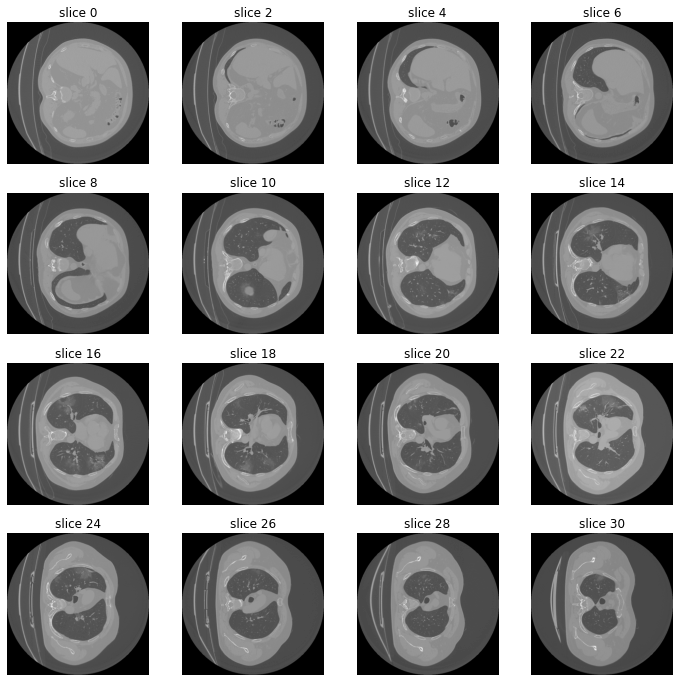

In [11]:
plot_slice_subsample(nimage=ct_img, grid_shape=4, start=0, step=2)

## Visualize different Housenfield ranges

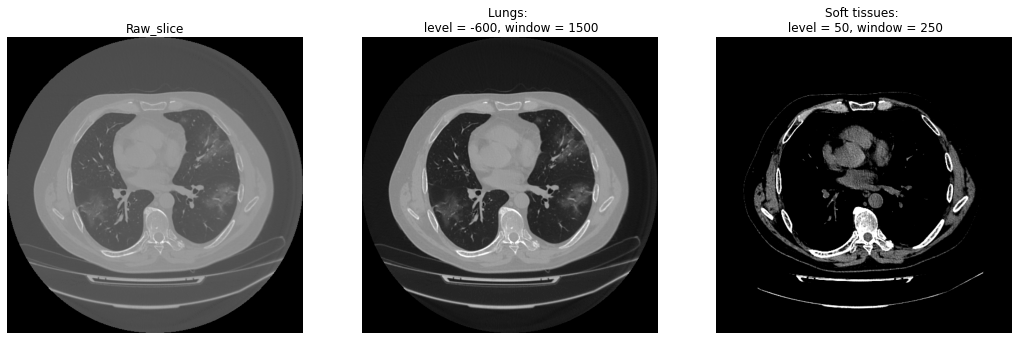

In [12]:
# Get slices for different tissues
raw_slice = get_single_slice(ct_img, 18)
lungs_slice = clip_housenfield_range(raw_slice, -200, 2000)
soft_tissue_slice = clip_housenfield_range(raw_slice, 50, 250)

# Visualize 
fig, ax = plt.subplots(1, 3, figsize=[18, 12])
ax[0].imshow(raw_slice.T, cmap="gray", origin="lower")
ax[0].set_title('Raw_slice')
ax[1].imshow(lungs_slice.T, cmap="gray", origin="lower")
ax[1].set_title('Lungs: \n level = -600, window = 1500')
ax[2].imshow(soft_tissue_slice.T, cmap="gray", origin="lower")
ax[2].set_title('Soft tissues: \n level = 50, window = 250')
[axi.set_axis_off() for axi in ax.ravel()]
plt.show()

## Segmentation mask

In [13]:
mask = nib.load(os.path.join(MOSMEDPATH, 'masks/study_0255_mask.nii.gz'))
print(mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  38   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.     0.923  0.923  8.     0.     0.     0.     0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Time=234114.350'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 222.194
qoffset_y       : -235.78648
qoffset_z       : -

In [14]:
type(mask)

nibabel.nifti1.Nifti1Image

In [15]:
mask.shape

(512, 512, 38)

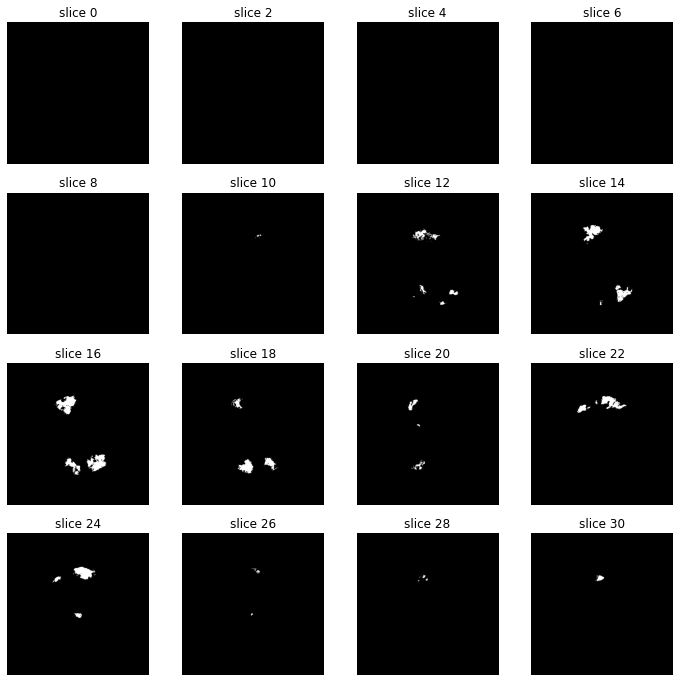

In [16]:
plot_slice_subsample(nimage=mask, grid_shape=4, start=0, step=2)

## Add lesion segmentation to the lung scan

A small subset of studies (50 pcs.) have been annotated by the experts of Research and Practical Clinical Center for
Diagnostics and Telemedicine Technologies of the Moscow Health Care Department. During the annotation for every given
image ground-glass opacifications and regions of consolidation were selected as positive (white) pixels on the corresponding
binary pixel mask. The resulting masks have been saved in  NIfTI  format and then transformed into  Gzip  archive.

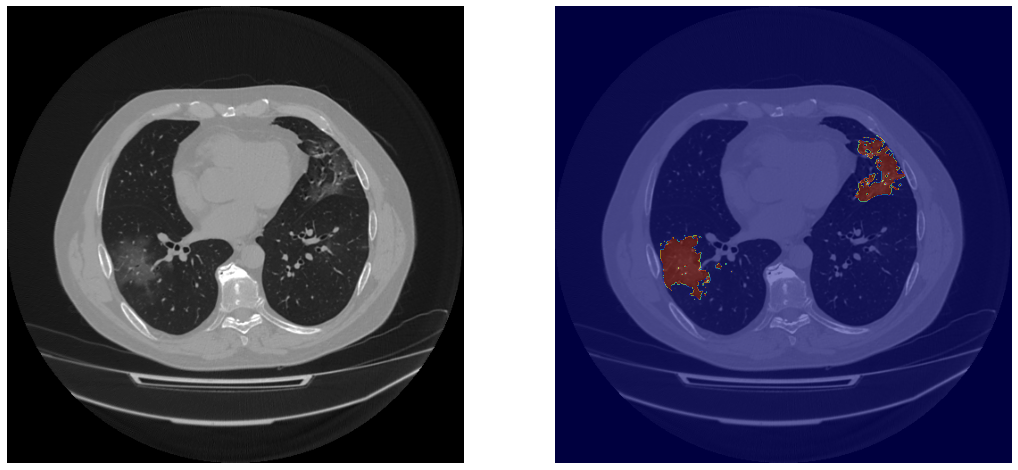

In [17]:
# Load images
lung_ct_img = nib.load(os.path.join(MOSMEDPATH, 'studies/CT-1/study_0255.nii.gz'))
lesion_mask = nib.load(os.path.join(MOSMEDPATH, 'masks/study_0255_mask.nii.gz'))

# Get same slices
lung_slice = get_single_slice(lung_ct_img, 16)
lesion_mask_slice = get_single_slice(lesion_mask, 16)

# Extract intensity
lungs_slice = clip_housenfield_range(lung_slice, -200, 2000)

# Apply mask
fig, ax = plt.subplots(1, 2, figsize=[18, 12])
ax[0].imshow(lungs_slice.T, cmap="gray", origin="lower")
ax[1].imshow(lungs_slice.T, cmap="gray", origin="lower")
ax[1].imshow(lesion_mask_slice.T, cmap="jet", origin="lower", alpha=0.5)
[axi.set_axis_off() for axi in ax.ravel()]
plt.show()